In [2]:
import pandas as panduh

data = panduh.read_csv("troop_movements.csv")
df = panduh.DataFrame(data)
display(df)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-07-11 10:21:57,1,at-st,empire,1,1,3,8,Ryloth
1,2024-07-11 10:21:56,2,stormtrooper,empire,7,5,10,5,Iridonia
2,2024-07-11 10:21:55,3,at-st,empire,6,9,2,8,Dathomir
3,2024-07-11 10:21:54,4,tie_silencer,empire,10,2,3,2,Champala
4,2024-07-11 10:21:53,5,tie_fighter,resistance,5,10,8,7,Rodia
...,...,...,...,...,...,...,...,...,...
995,2024-07-11 10:05:22,996,stormtrooper,resistance,3,10,8,8,Aleen Minor
996,2024-07-11 10:05:21,997,x-wing,resistance,7,8,6,9,Kalee
997,2024-07-11 10:05:20,998,resistance_soldier,resistance,5,10,10,1,Tund
998,2024-07-11 10:05:19,999,resistance_soldier,resistance,4,7,8,3,Sullust


In [11]:
allegiances = df.groupby("empire_or_resistance").size().reset_index(name="counts")
display(allegiances)

,empire_or_resistance,counts
0,empire,509
1,resistance,491


In [12]:
homeworlds = df.groupby("homeworld").size().reset_index(name="counts")
display(homeworlds)

,homeworld,counts
0,Alderaan,28
1,Aleen Minor,32
2,Bestine IV,30
3,Cerea,27
4,Champala,19
5,Chandrila,18
6,Concord Dawn,25
7,Corellia,27
8,Dagobah,24
9,Dathomir,24


In [13]:
unit_types = df.groupby("unit_type").size().reset_index(name="counts")
display(unit_types)

,unit_type,counts
0,at-at,137
1,at-st,129
2,resistance_soldier,110
3,stormtrooper,114
4,tie_fighter,137
5,tie_silencer,125
6,unknown,108
7,x-wing,140


In [18]:
df["is_resistance"] = df["empire_or_resistance"] == "resistance"
display(df["empire_or_resistance"], df["is_resistance"])

0          empire
1          empire
2          empire
3          empire
4      resistance
          ...    
995    resistance
996    resistance
997    resistance
998    resistance
999    resistance
Name: empire_or_resistance, Length: 1000, dtype: object

0      False
1      False
2      False
3      False
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Name: is_resistance, Length: 1000, dtype: bool

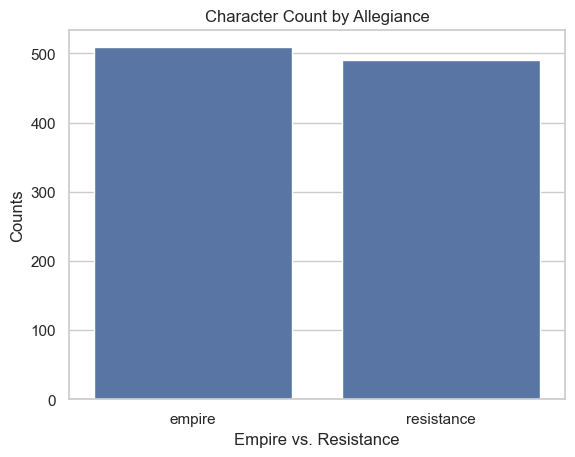

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.barplot(x="empire_or_resistance", y="counts", data=allegiances)
plt.title("Character Count by Allegiance")
plt.xlabel("Empire vs. Resistance")
plt.ylabel("Counts")
plt.show()


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [26]:
X = data[["unit_type", "homeworld"]]
Y = data["empire_or_resistance"]
categorical_features = ["unit_type", "homeworld"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Transform the training data
X_train_dummied = panduh.get_dummies(X_train)

# Transform the testing data
X_test_dummied = panduh.get_dummies(X_test)

model = DecisionTreeClassifier()
model.fit(X_train_dummied, Y_train)
Y_pred = model.predict(X_test_dummied)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.52
